# **REGEX FINAL PROJECT**
# **GARBAGE CLASSIFICATION**
# **Team - 22**

Team Members


1.   Urmi Adak

2.   Shereen Anthony


3.   Shaik Rahulpasha
4.   Ananya Agarwal






Mentor

Mohit Mathur

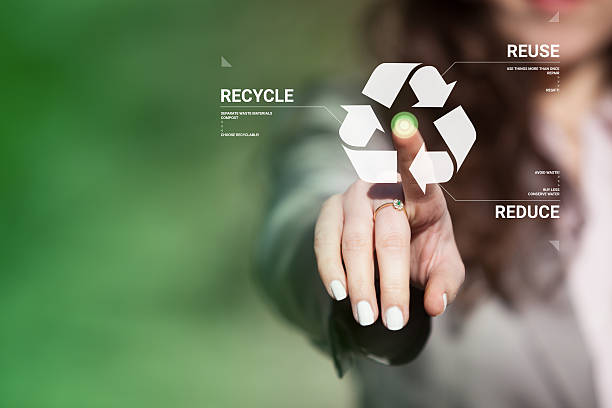


Why Is Recycling Important?
5 Reasons

1.Reduces carbon emissions

2.Conserve natural resources

3.Strengthens property value

4.Minimizes waste accumulation

5.Technological advancement acceleration



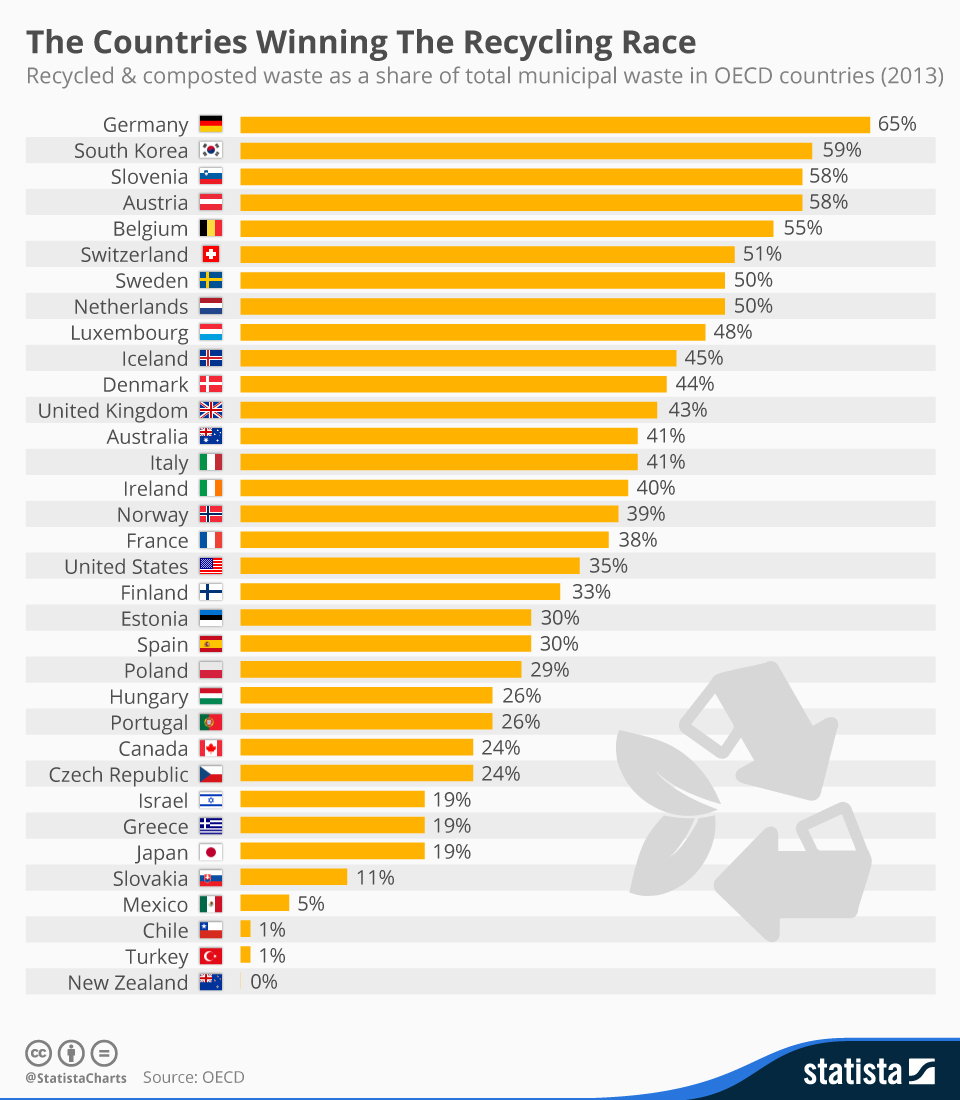

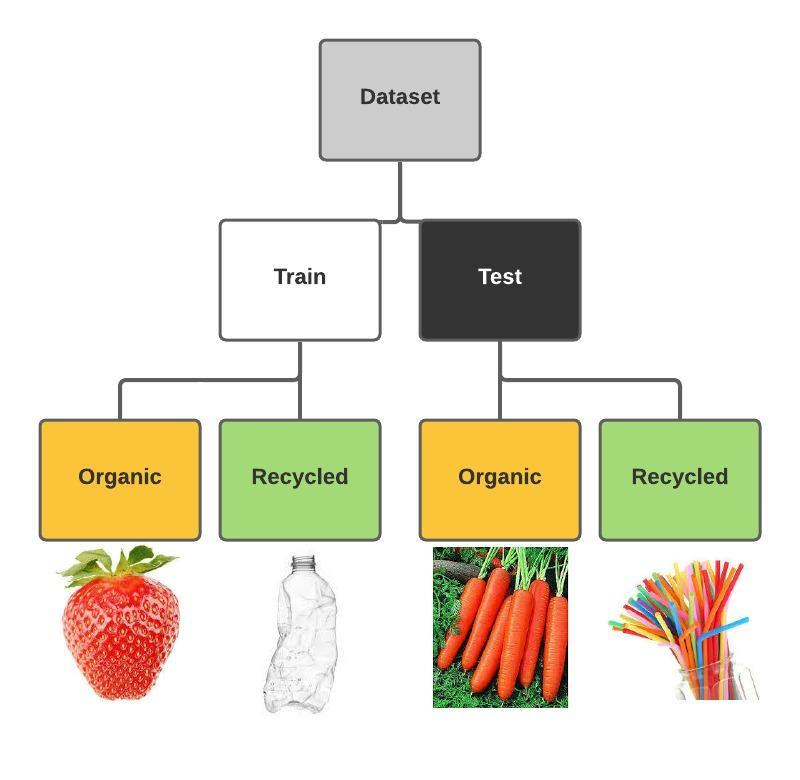

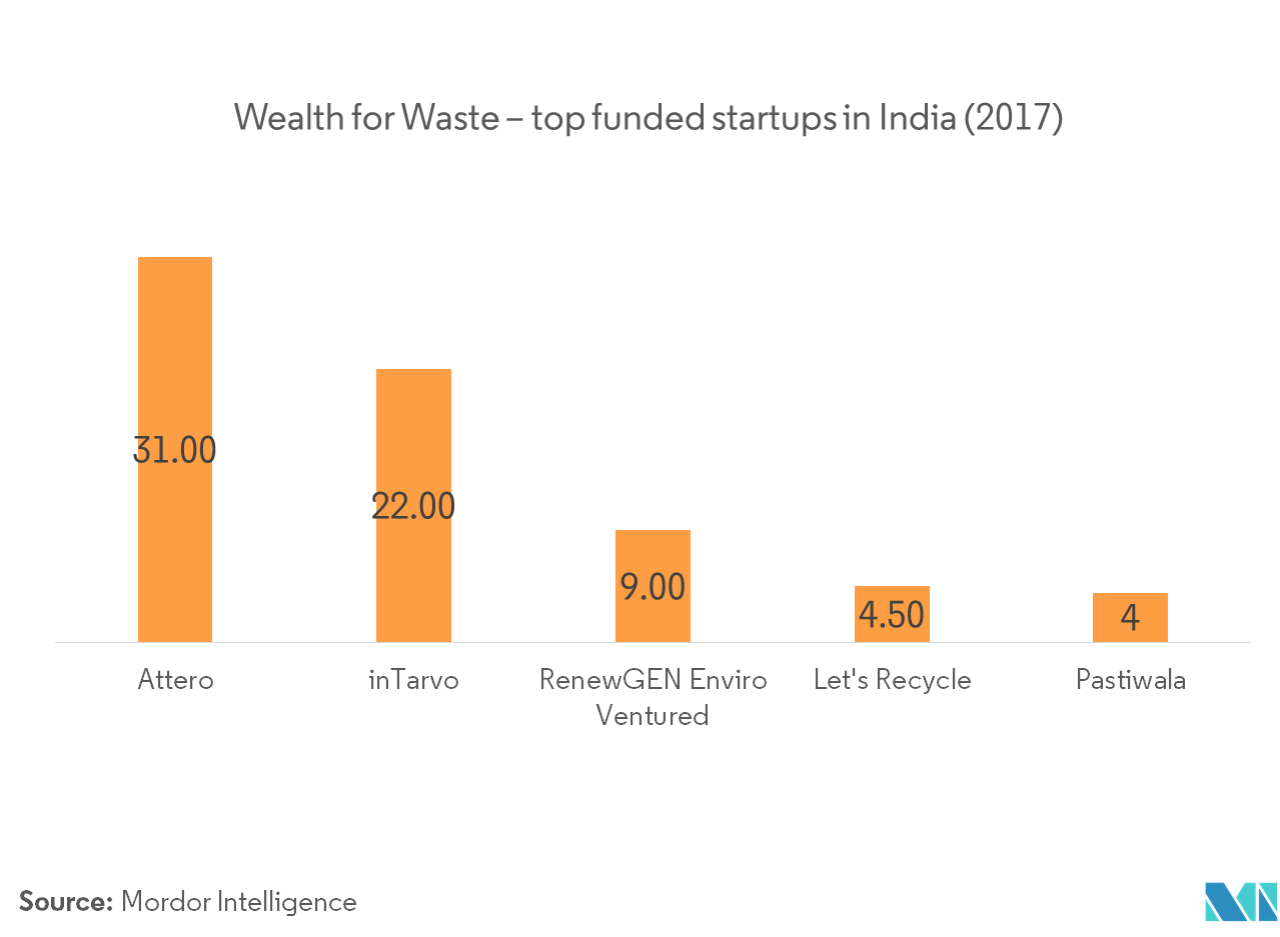

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# setting the path and the labels list for classification of targets on the basis in human understandable form
train_dir = os.path.join('/content/drive/MyDrive/Regex_CNN_Project/datasets/TRAIN')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [5]:
# checking the size of data available to us for training out model
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 323
Images of label "glass":	 401
Images of label "metal":	 328
Images of label "paper":	 476
Images of label "plastic":	 386
Images of label "trash":	 87


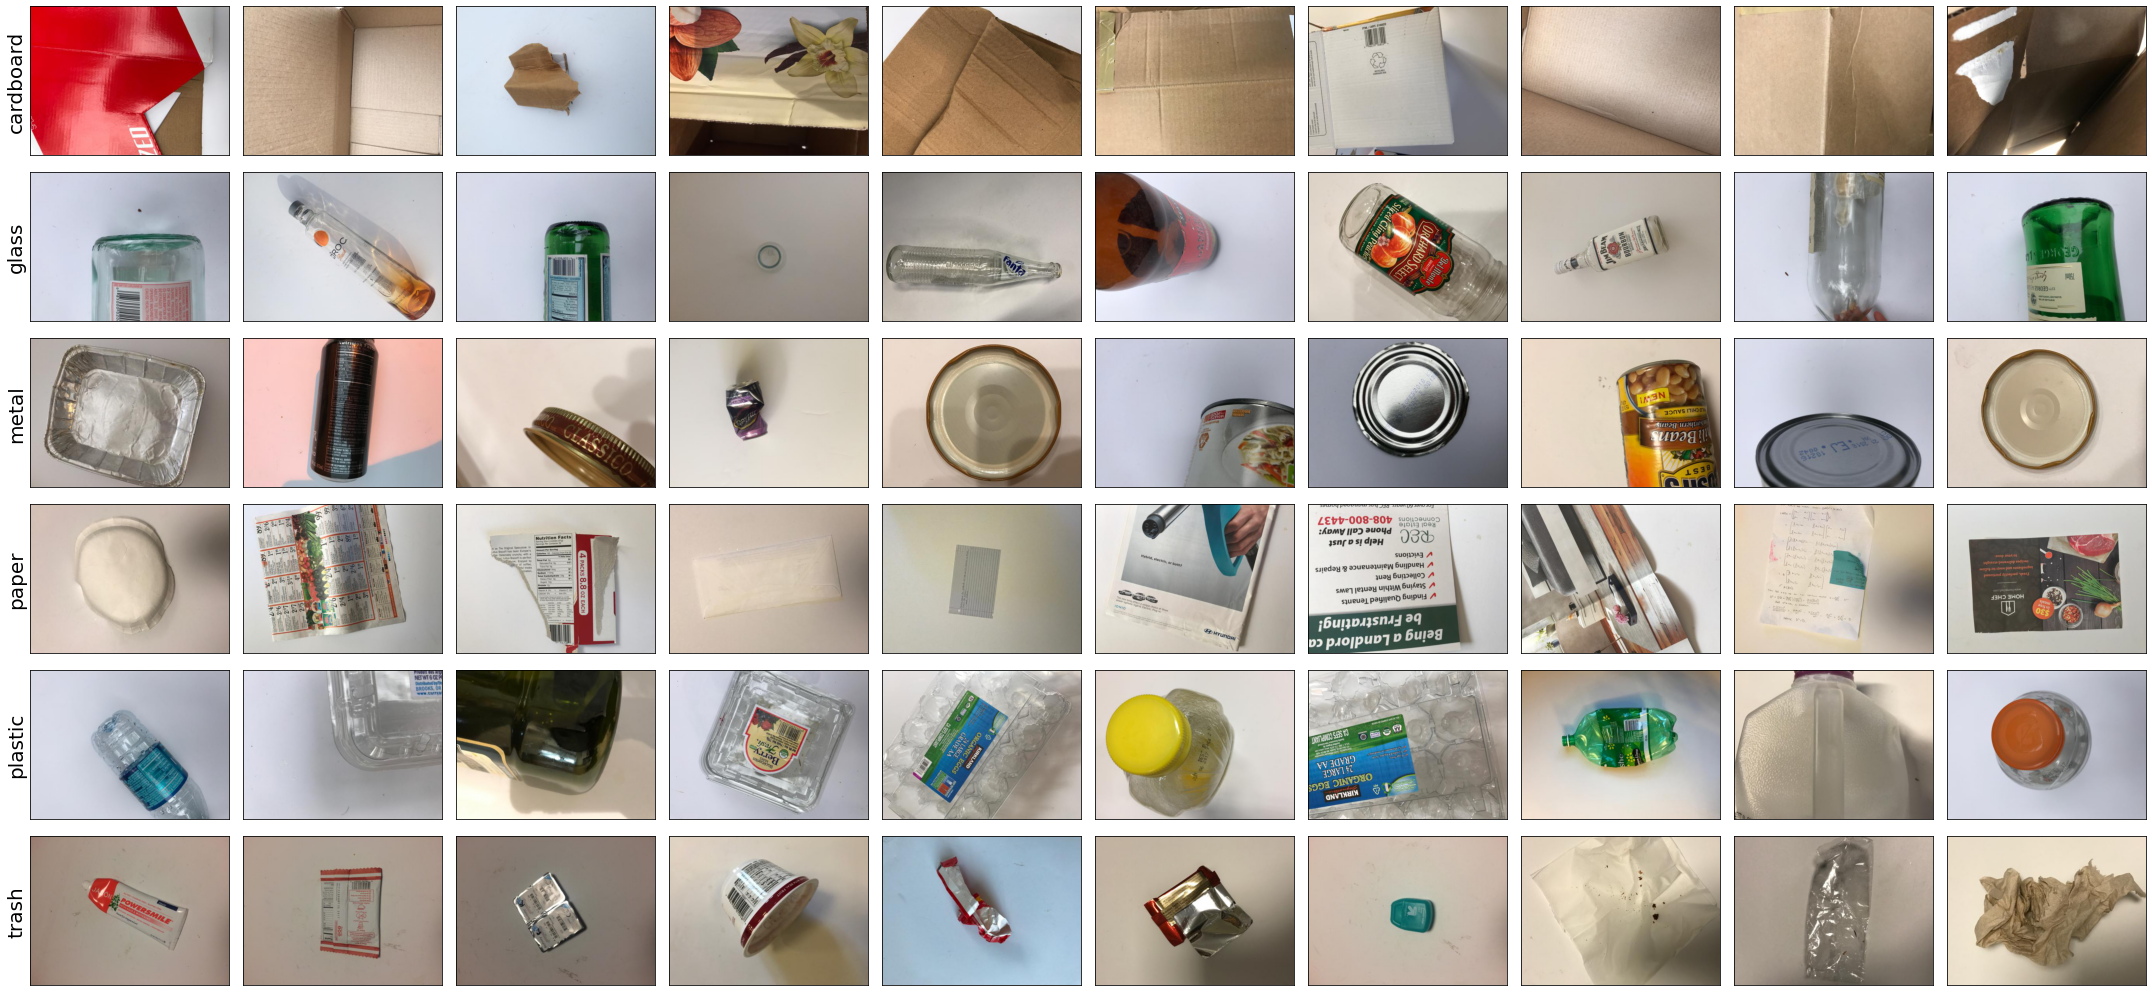

In [6]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [7]:
directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

Deep Learning


In [8]:
# creating the model

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 510, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 382, 510, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 508, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 380, 508, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 254, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 190, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 188, 252, 64)      1

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'])

In [10]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.


In [11]:
# creating the callback function so that it can be used to end the training in case reached a good accuracy rate (above 90%)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [12]:
#fitting the model 120
history = model.fit(train_generator, epochs=25, steps_per_epoch = 1, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/25
1/1 [==============================] - 276s 276s/step - loss: 2.7004 - accuracy: 0.2188 - val_loss: 1.7905 - val_accuracy: 0.1658
Epoch 2/25
1/1 [==============================] - 271s 271s/step - loss: 2.7813 - accuracy: 0.2188 - val_loss: 1.7911 - val_accuracy: 0.1608
Epoch 3/25
1/1 [==============================] - 240s 240s/step - loss: 2.6183 - accuracy: 0.3438 - val_loss: 1.8000 - val_accuracy: 0.1608
Epoch 4/25
1/1 [==============================] - 233s 233s/step - loss: 2.3459 - accuracy: 0.3438 - val_loss: 1.8204 - val_accuracy: 0.1608
Epoch 5/25
1/1 [==============================] - 236s 236s/step - loss: 3.5559 - accuracy: 0.3438 - val_loss: 1.8515 - val_accuracy: 0.1608
Epoch 6/25
1/1 [==============================] - 233s 233s/step - loss: 2.2745 - accuracy: 0.3438 - val_loss: 1.8899 - val_accuracy: 0.1608
Epoch 7/25
1/1 [==============================] - 232s 232s/step - loss: 2.0007 - accuracy: 0.4062 - val_loss: 1.9282 - val_accuracy: 0.1608
Epoch 8/25
1/

In [13]:
def plot_acc_loss(result):
  # function to plot the accuracy and loss graphs
  acc = result.history['accuracy']
  val_acc = result.history['val_accuracy']
  loss = result.history['loss']
  val_loss = result.history['val_loss']

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title("Training and Validation Accuracy")
  plt.plot(acc, label = 'Training Acuracy')
  plt.plot(val_acc, label = 'Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(loss, label = 'Training Loss')
  plt.plot(val_loss, label = 'Validation Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

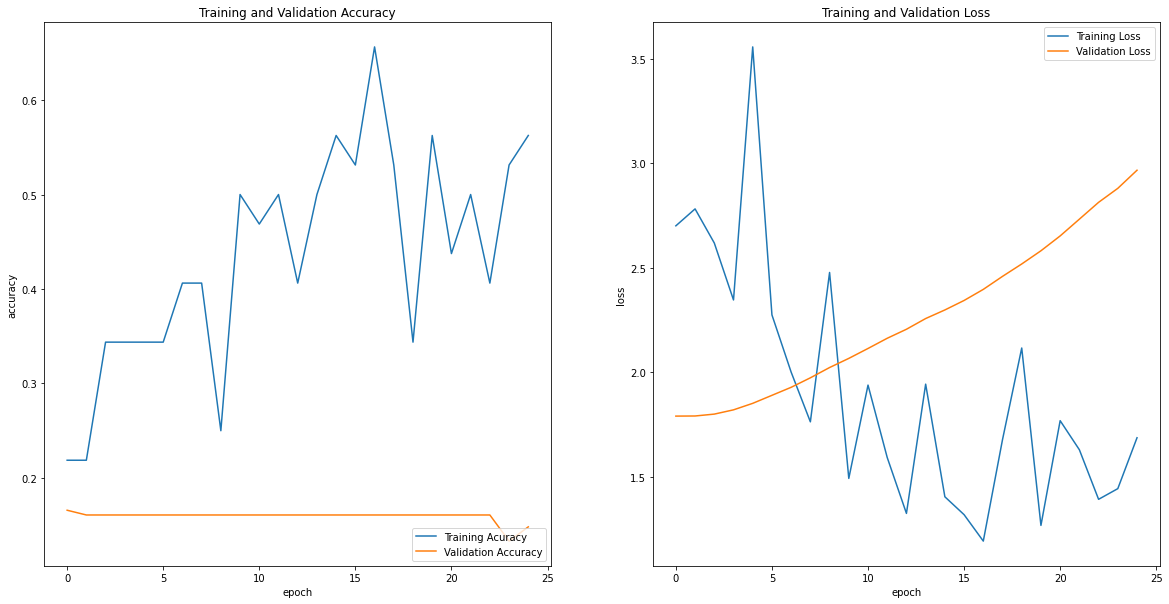

In [14]:
plot_acc_loss(history)

Enter any category by index: 3
Enter any index to test: 3


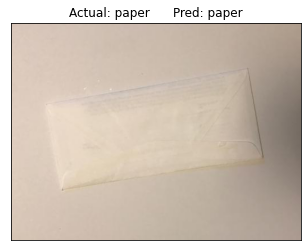

In [19]:
cat = int(input('Enter any category by index: '))
ind = int(input('Enter any index to test: '))

directory = os.path.join(train_dir, labels[cat % 6])
try:
    path = os.path.join(directory, os.listdir(directory)[ind])
    img = mpimg.imread(path)
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]
    
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(labels[cat], pred))
    
except:
    print('Invalid Value')

Text(0.5, 1.0, 'Training and Validation Accuracy')

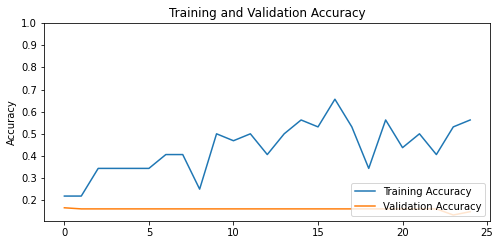

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# plot accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

